In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#img3200 - ground truth and yolov8 detection results
GT1 = pd.read_csv('GTlmg3200.csv')
GT1

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,Ball,460,277,12,12,left003200.png,1280,720,466.0,283.0
1,Ball,458,282,11,12,left003201.png,1280,720,463.5,288.0
2,Ball,456,287,12,12,left003202.png,1280,720,462.0,293.0
3,Ball,456,293,10,11,left003203.png,1280,720,461.0,298.5
4,Ball,454,300,11,9,left003204.png,1280,720,459.5,304.5
...,...,...,...,...,...,...,...,...,...,...
90,Ball,449,238,11,10,left003296.png,1280,720,454.5,243.0
91,Ball,452,239,12,9,left003297.png,1280,720,458.0,243.5
92,Ball,454,241,14,10,left003298.png,1280,720,461.0,246.0
93,Ball,458,242,12,12,left003299.png,1280,720,464.0,248.0


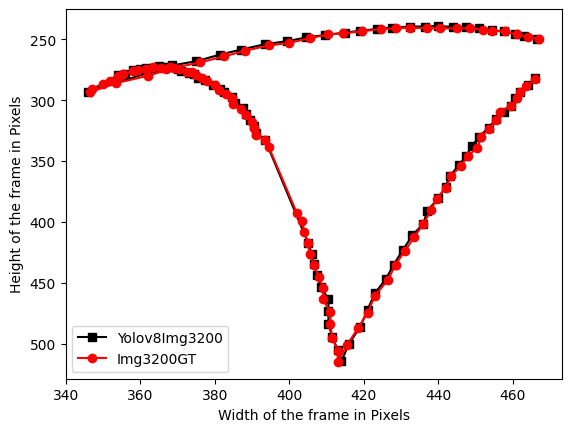

In [5]:
#image 3200 - ground truth and yolov8 detection results
df = pd.read_csv('YoloV8Img3200.csv')
#PLOT ground truth and YoloV8 detection results
from matplotlib import markers
plt.plot(df['center_x'], df['center_y'], marker='s', color='black', label='Yolov8Img3200')
plt.plot(GT1['center_x'], GT1['center_y'], marker='o', color='red', label='Img3200GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

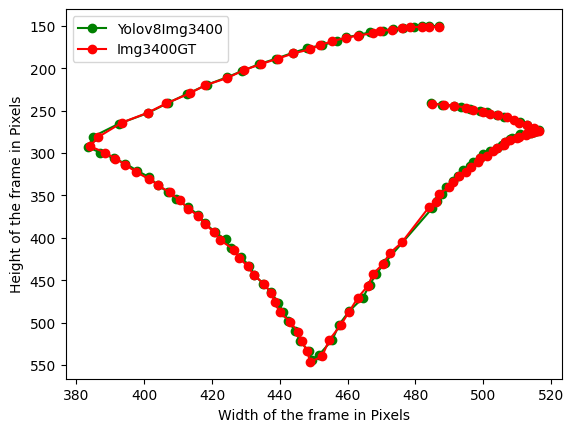

In [15]:
#img 3400 - ground truth and yolov8 detection results
df2 = pd.read_csv('YoloV8Img3400.csv')
GT2 = pd.read_csv('GT_Img3400.csv')
#plot
from matplotlib import markers
plt.plot(df2['center_x'], df2['center_y'], marker='o', color='green', label='Yolov8Img3400')
plt.plot(GT2['center_x'], GT2['center_y'], marker='o', color='red', label='Img3400GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

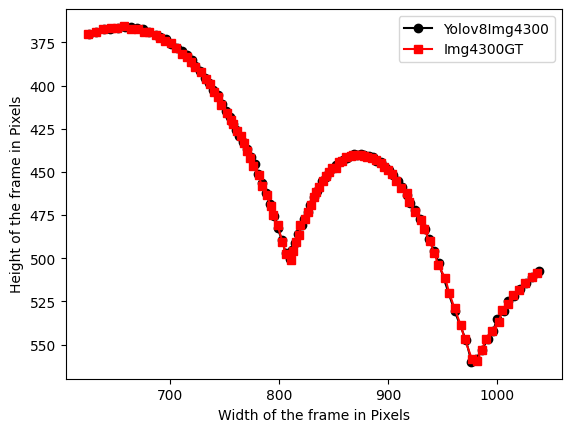

In [6]:
#img 4300 - ground truth and yolov8 detection results   
df3 = pd.read_csv('YoloV8Img4300.csv')
GT3 = pd.read_csv('GT_Img4300.csv')
#plot 
from matplotlib import markers
plt.plot(df3['center_x'], df3['center_y'], marker='o', color='black', label='Yolov8Img4300')
plt.plot(GT3['center_x'], GT3['center_y'], marker='s', color='red', label='Img4300GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

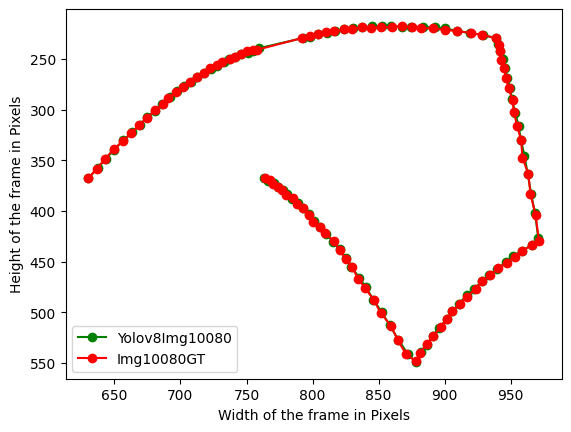

In [18]:
#img 10080 - ground truth and yolov8 detection results
df4 = pd.read_csv('Yolo8Img10080.csv')
GT4 = pd.read_csv('GT_Img10080.csv')

#plot
from matplotlib import markers
plt.plot(df4['center_x'], df4['center_y'], marker='o', color='green', label='Yolov8Img10080')
plt.plot(GT4['center_x'], GT4['center_y'], marker='o', color='red', label='Img10080GT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

ADE and FDE, AMD calculation for predicted (x,y) and ground truth (x,y)

In [19]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

In [20]:
#AMD function definition
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

In [ ]:
#define function for code reusability
def plot(predicted, ground_truth):
    plt.plot(predicted[:, 0], predicted[:, 1], marker='o', color='green', label='Predicted')
    plt.plot(ground_truth[:, 0], ground_truth[:, 1], marker='o', color='red', label='Ground Truth')
    plt.ylim(max(plt.ylim()), min(plt.ylim()))
    plt.xlabel('Width of the frame in Pixels')
    plt.ylabel('Height of the frame in Pixels')
    plt.legend()
    plt.show()
    
def pair(x, y):
    count = 0
    for i in range(len(x)):
        predicted_coordinates = list(zip(x,y))
        ground_coordinates = list(zip(x,y))
        count += 1
    return predicted_coordinates, ground_coordinates

In [36]:
x1= GT1['center_x']
y1= GT1['center_y']
x2= df['center_x']
y2= df['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates1 = list(zip(x2,y2))
    ground_coordinates1 = list(zip(x1,y1))
    count += 1

In [37]:
error1 = avg_displacement_error(predicted_coordinates1, ground_coordinates1)
error2 = avg_mahalanobis_distance(predicted_coordinates1, ground_coordinates1)
print('ADE for Yolov8 (img3200) is:', error1, 'and AMD for Yolov8 (img3200) is:', error2)

ADE for Yolov8 (img3200) is: 18.662177157469902 and AMD for Yolov8 (img3200) is: 0.6093651039088089


In [38]:
x3= GT2['center_x']
y3= GT2['center_y']
x4= df2['center_x']
y4= df2['center_y']
count = 0
for i in range(len(x3)):
    predicted_coordinates2 = list(zip(x4,y4))
    ground_coordinates2 = list(zip(x3,y3))
    count += 1

In [39]:
error3 = avg_displacement_error(predicted_coordinates2, ground_coordinates2)
error4 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates2)
print('ADE for Yolov8 (img 3400) is:', error3, 'and AMD for Yolov8 (img 3400) is:', error4)

ADE for Yolov8 (img 3400) is: 27.174754308951503 and AMD for Yolov8 (img 3400) is: 0.48239054976874085


In [40]:
x5 = GT3['center_x']
y5 = GT3['center_y']
x6 = df3['center_x']
y6 = df3['center_y']
count = 0
for i in range(len(x5)):
    predicted_coordinates3 = list(zip(x6,y6))
    ground_coordinates3 = list(zip(x5,y5))
    count += 1

In [41]:
error5 = avg_displacement_error(predicted_coordinates3, ground_coordinates3)
error6 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates3)
print('ADE for Yolov8 (img 4300):', error5, 'and AMD for Yolov8 (img 4300) is:', error6)

ADE for Yolov8 (img 4300): 6.7153157782721555 and AMD for Yolov8 (img 4300) is: 0.29166406654551286


In [42]:
x7 = GT4['center_x']
y7 = GT4['center_y']
x8 = df4['center_x']
y8 = df4['center_y']

count = 0
for i in range(len(x7)):
    predicted_coordinates4 = list(zip(x8,y8))
    ground_coordinates4 = list(zip(x7,y7))
    count += 1

In [43]:
error7 = avg_displacement_error(predicted_coordinates4, ground_coordinates4)
error8 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates4)
print('ADE for Yolov8 (img 10080):', error7, 'and AMD for Yolov8 (img 10080) is:', error8)

ADE for Yolov8 (img 10080): 0.8822901721829266 and AMD for Yolov8 (img 10080) is: 0.012986385842607858
